# Exercises


### 1) ISI histogram for simulated Poisson process

cv:  0.996281151718301
fano factor:  1.1455555555555557


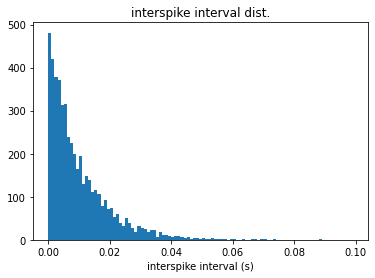

In [1]:
from matplotlib import pyplot as plt
import numpy as np

T = 50
#dt = .01
t = 0
r = 100

# get times for Poisson spikes
spikes = []
isi = []
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r # current isi
    t += i
    if t < T:
        spikes.append(t)
    isi.append(i)

# coefficient of variation (should be around 1)
isi_std = np.std(isi)
isi_mean = np.mean(isi)
cv = isi_std/isi_mean
print('cv: ', cv)

# fano factor for spike counts obtained over count intervals of length t
spike_counts = []
for i in range(1000):
    t = .0200 # count interval of 20ms
    # get random counts within an interval of length t
    x = np.random.randint(0, len(isi)) # starting index
    count = 0
    val0 = isi[np.random.randint(0, len(isi))]
    val = 0
    while (val < val0 + t) and (x < len(isi)):
        val += isi[x]
        x += 1
        count += 1
    spike_counts.append(count)

print('fano factor: ', (np.var(spike_counts)/np.mean(spike_counts)))

# plot isi histogram
plt.hist(isi, bins=np.arange(0,.1,.001))
plt.title('interspike interval dist.')
plt.xlabel('interspike interval (s)')
plt.show()

This looks like an exponential distribution, which is what it should be (see above section on isi distributions).

### 2) Adding refractory period

cv:  0.674604972416853
fano factor:  0.5261238223418573


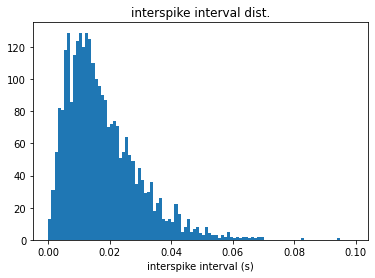

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

T = 50
#dt = .01
t = 0
r_max = 100

# get initial times for Poisson spikes
isi = []
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        isi.append(i)

# spike thinning, with time constant tau (s) for recovery
new_isi = []
t = 0
tau = .010 # .001 to .020 (s)

for i in range(len(isi)):
    # get firing rate at the time of each spike (t=isi)
    t += isi[i]
    r = r_max*(1-np.exp(-1*t/tau))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_isi.append(t)
        t = 0

isi = new_isi

# cv
isi_std = np.std(isi)
isi_mean = np.mean(isi)
cv = isi_std/isi_mean
print('cv: ', cv)

# fano factor for spike counts obtained over 100ms intervals
spike_counts = []
for i in range(1000):
    t = .100 # (s)
    # get random counts within an interval of length t
    x = np.random.randint(0, len(isi)) # starting index
    count = 0
    val0 = isi[np.random.randint(0, len(isi))]
    val = 0
    while (val < val0 + t) and (x < len(isi)):
        val += isi[x]
        x += 1
        count += 1
    spike_counts.append(count)

print('fano factor: ', (np.var(spike_counts)/np.mean(spike_counts)))

# plot isi histogram
plt.hist(isi, bins=np.arange(0,.1,.001))
plt.title('interspike interval dist.')
plt.xlabel('interspike interval (s)')
plt.show()

There are fewer spikes that come immediately after another (extremely low ISIs are more infrequent than in the previous simulation), which suggests accurate data.

### 3) Autocorrelation histograms
similar to the isi histogram, but shows the distribution of times between any 2 spikes (not just consecutive spikes)

#### Constant firing rate: 100 Hz

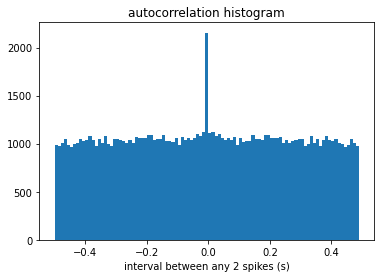

In [4]:
from matplotlib import pyplot as plt
import numpy as np

T = 10
#dt = .01
t = 0
r = 100

# get times for Poisson spikes
spikes = []
times = [] # autocorrelation, all possible intervals
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r # current isi
    t += i
    if t < T:
        spikes.append(t)

# autocorrelation
for i in spikes:
    for j in spikes:
        times.append(j-i)

# plot autocorrelation histogram
plt.hist(times, bins=np.arange(-.5,.5,.01))
plt.title('autocorrelation histogram')
plt.xlabel('interval between any 2 spikes (s)')
plt.show()

All intervals have roughly the same probability, as expected from a Poisson distribution. Spike at 0.0 to 2000 is twice the average value of 1000 because the interval between each spike and itself was counted twice.

#### Constant firing rate with refractory period

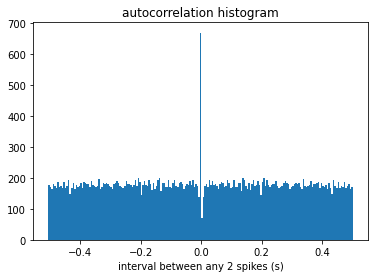

In [5]:
from matplotlib import pyplot as plt
import numpy as np

T = 10
#dt = .01
t = 0
r_max = 100

# get initial times for Poisson spikes
isi = []
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        isi.append(i)

# spike thinning, with time constant tau (s) for recovery
new_isi = []
spikes = []
t = 0
tau = .010 # .001 to .020 (s)

for i in range(len(isi)):
    # get firing rate at the time of each spike (t=isi)
    t += isi[i]
    r = r_max*(1-np.exp(-1*t/tau))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_isi.append(t)
        t = 0

isi = new_isi
t = 0
for i in isi:
    t += i
    spikes.append(t)

# autocorrelation
times = []
for i in spikes:
    for j in spikes:
        times.append(j-i)

# plot autocorrelation histogram
plt.hist(times, bins=np.arange(-.505,.505,.005))
plt.title('autocorrelation histogram')
plt.xlabel('interval between any 2 spikes (s)')
plt.show()

Notice the drop in intervals around 0 due to the refractory period.

#### Variable firing rate $r(t)=100(1+\cos(2\pi t/25 \text{ ms})) \text{ Hz}$

$\omega = 2\pi / .025 = 2\pi f = 2\pi / T$

$T = .025$ s

$f = 40$ Hz, which is a gamma wave in the brain, and is a frequency of particular interest because it's linked to Alzheimer's treatment.

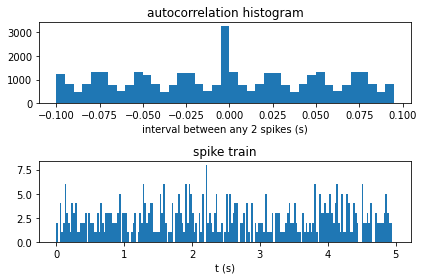

In [6]:
from matplotlib import pyplot as plt
import numpy as np

T = 20 # trial duration (s)

# get initial times for Poisson spikes
spikes = []
t = 0
r_max = 200

while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        spikes.append(t)

# spike thinning
new_spikes = []
for i in spikes:
    # time-dependent firing rate function r(t); (T=25 ms, A=100Hz)
    r = 100*(1+ np.cos(2*np.pi*i/.025))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_spikes.append(i)

spikes = new_spikes

# autocorrelation
times = []
for i in spikes:
    for j in spikes:
        times.append(j-i)

# plot autocorrelation histogram
fig, axs = plt.subplots(2)

axs[0].hist(times, bins=np.arange(-.1,.1,.005))
axs[0].set_title('autocorrelation histogram')
axs[0].set_xlabel('interval between any 2 spikes (s)')

axs[1].hist(spikes, bins=np.arange(0, 5, .025))
axs[1].set_title('spike train')
axs[1].set_xlabel('t (s)')
fig.tight_layout()
plt.show()

Period of 0.025 s (25 ms) is equal to the period of the cos wave in $r(t)$, so that's a sign that the histogram is accurate. Related to theta waves in brain, which have a frequency of 4-8 Hz.

### 4) Poisson spike train with $r(t)=100(1+\cos(2\pi t/300\text{ ms})) \text{ Hz}$

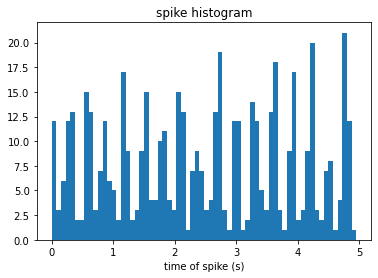

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# 1) generate Poisson spike train with r(t) above

T = 20 # trial duration (s)

# get initial times for Poisson spikes
spikes = []
t = 0
r_max = 200

while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        spikes.append(t)

# spike thinning
new_spikes = []
for i in spikes:
    # time-dependent firing rate function r(t); (T=300 ms, A=100Hz)
    r = 100*(1+ np.cos(2*np.pi*i/.300))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_spikes.append(i)

spikes = new_spikes

# plot spike histogram
plt.hist(spikes, bins=np.arange(0, 5, .075))
plt.title('spike histogram')
plt.xlabel('time of spike (s)')
plt.show()

### 5) "Paradox" with constant rate Poisson process
Every sequence of N spikes occurring over a given time interval $T$ is equally likely, but we don't expect to see all N spikes appearing within the first 1% of the time interval. This isn't a paradox because if you restrict the spikes to be in the first 1% of the given time interval, you're changing the time interval being used to a smaller length, so the probability of N spikes in that smaller intervals is much lower. Getting any specific sequence of N spikes in T is just as unlikely as getting all N spikes in the first 1% of the interval, but the probability that the N spikes is in the first 80% of the interval (for example) is higher since the restricted interval is larger.

### 6) White-noise stimulus generator

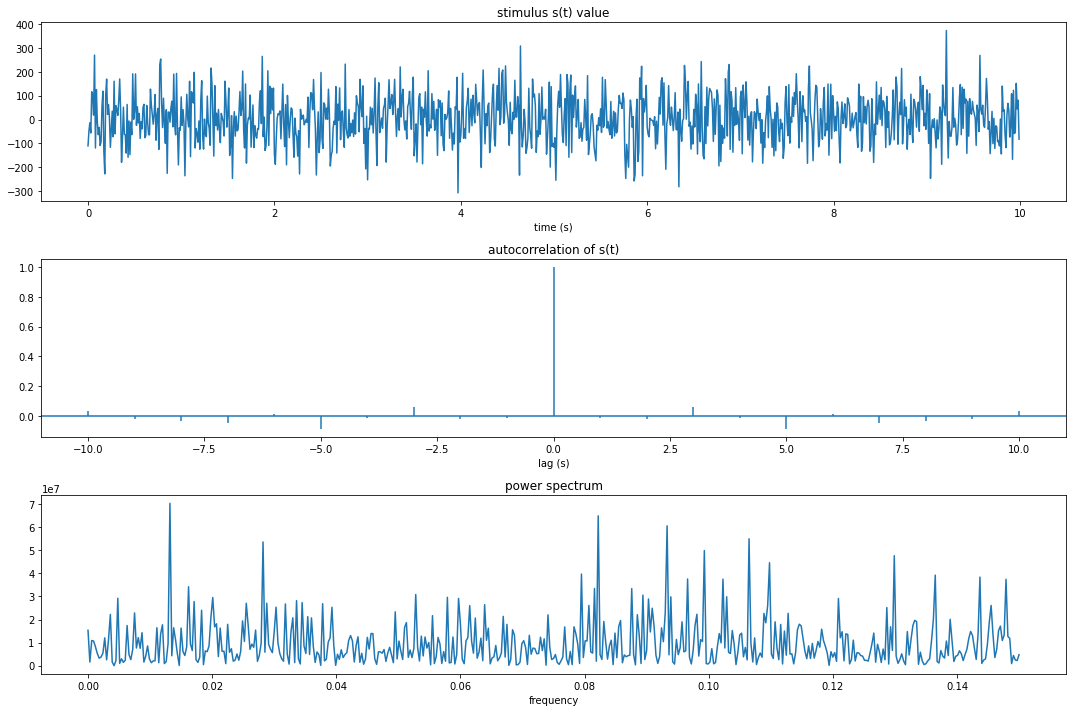

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Approx WN stimulus values from PD with mean=0, variance=a/dt
dt = .01 # (s)
a = 1 # from Q_{ss}(tau) = a*dirac(tau)
T = 10 # (s), total stimulus duration

fig, axs = plt.subplots(3, figsize=(15,10))

# plot WN stimulus
s = np.random.normal(loc=0, scale=(a/dt), size=(int(T/dt),))
t = np.arange(0.0, T, dt)

axs[0].plot(t, s)
axs[0].set_title('stimulus s(t) value')
axs[0].set_xlabel('time (s)')

# plot autocorrelation histogram
axs[1].acorr(s)
axs[1].set_title('autocorrelation of s(t)')
axs[1].set_xlabel('lag (s)')

# plot power spectrum of s(t)
fourier_transform = np.fft.rfft(s)
power_spectrum = np.square(np.abs(fourier_transform))
frequency = np.linspace(0, .3/2, len(power_spectrum))

axs[2].plot(frequency, power_spectrum)
axs[2].set_title('power spectrum')
axs[2].set_xlabel('frequency')

fig.tight_layout()
plt.show()

Stimulus looks like white noise, which is promising. Autocorrelation roughly looks the way it should be: 0 everywhere besides $x=0$, with a few small spikes on the graph bc the data isn't perfect. Power spectrum seems relatively stable, with a few spikes that probably relate to the same data imperfections that caused the small spikes in the autocorrelation graph, but it's still extremely flat considering the y-scale is 1e7.

Setting a different variance for the normal dist (a/50/dt instead of a/dt) leads to fluctuations in the power spectrum from 0 to 20000. So, this current variance value leads to a relatively much flatter power spectrum.